# Dijkstra's algorithm

Dijkstra's algorithm is an algorithm for finding the shortest paths between nodes in a graph, which may represent, for example, road networks. It was conceived by computer scientist Edsger W. Dijkstra in 1956 and published three years later.

wikipedia

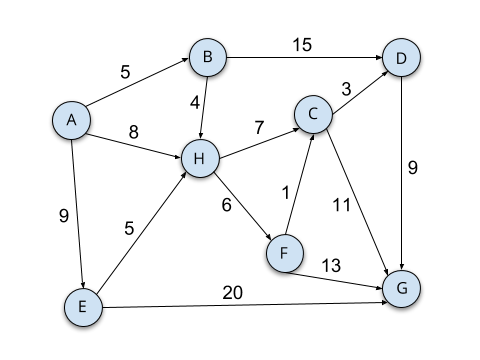

In [115]:
from IPython.display import Image
graph = Image('Weighted_Graph_480_360.png')
graph

Dijkstra can only handle positive edge weights.

It can find the shortest path from A to B. It is able to construct a shortest path tree. (define the shortest paths from a source to all the other nodes.

This is asymptotically the fastest known signle-source shortest-path algorithm for arbitrary directed graphs with unbounded non-negative weights.


### Node Class

In [116]:
import sys
import heapq

class Node(object):
    def __init__(self, name):
        self.name = name
        self.visited = False
        self.predecessor = None
        self.adjacencyList = list()
        self.minDistance = sys.maxsize
        
    def __cmp__(self, otherNode):
        return self.cmp(self.minDistance, otherNode.minDistance)

    def __lt__(self, other):
        selfPriority = self.minDistance
        otherPriority = other.minDistance
        return selfPriority < otherPriority

### Edge Class

In [117]:
class Edge(object):
    def __init__(self, weight, startNode, targetNode):
        self.weight = weight
        self.startNode = startNode
        self.targetNode = targetNode

### Dijkstra

In [118]:
class Dijkstra(object):
    def calculateShortestPath(self, nodeList, startNode):
        q = list()
        heapq.heapify(q)
        startNode.minDistance = 0
        heapq.heappush(q, startNode)

        while len(q) > 0:
            actualNode = heapq.heappop(q)
            for edge in actualNode.adjacencyList:
                u = edge.startNode
                v = edge.targetNode
                newDistance = u.minDistance + edge.weight

                if newDistance < v.minDistance:
                    v.predecessor = u
                    v.minDistance = newDistance
                    heapq.heappush(q, v)

    def getShortestPath(self, startNode, targetNode):
        print("Shortest distance between %s and %s is : %d" %(startNode.name, targetNode.name, targetNode.minDistance))
        
        Path_from_start_to_end = list() 
        Node = targetNode
        while Node is not None:
            Path_from_start_to_end.append(Node.name)
            Node = Node.predecessor
        print("The path is: " + " ".join(Path_from_start_to_end[::-1]))

### Node

In [119]:
node_A = Node("A")
node_B = Node("B")
node_C = Node("C")
node_D = Node("D")
node_E = Node("E")
node_F = Node("F")
node_G = Node("G")
node_H = Node("H")

### Edges

In [120]:
edge1 = Edge(5, node_A, node_B)
edge2 = Edge(8, node_A, node_H)
edge3 = Edge(9, node_A, node_E)
edge4 = Edge(15, node_B, node_D)
edge5 = Edge(12, node_B, node_C)
edge6 = Edge(4, node_B, node_H)
edge7 = Edge(7, node_H, node_C)
edge8 = Edge(6, node_H, node_F)
edge9 = Edge(5, node_E, node_H)
edge10 = Edge(20, node_E, node_G)
edge11 = Edge(1, node_F, node_C)
edge12 = Edge(13, node_F, node_G)
edge13 = Edge(3, node_C, node_D)
edge14 = Edge(11, node_C, node_G)
edge15 = Edge(9, node_D, node_G)

### Adjacency List

In [121]:
node_A.adjacencyList.append(edge1)
node_A.adjacencyList.append(edge2)
node_A.adjacencyList.append(edge3)
node_B.adjacencyList.append(edge4)
node_B.adjacencyList.append(edge5)
node_B.adjacencyList.append(edge6)
node_H.adjacencyList.append(edge7)
node_H.adjacencyList.append(edge8)
node_E.adjacencyList.append(edge9)
node_E.adjacencyList.append(edge10)
node_F.adjacencyList.append(edge11)
node_F.adjacencyList.append(edge12)
node_C.adjacencyList.append(edge13)
node_C.adjacencyList.append(edge14)
node_D.adjacencyList.append(edge15)

nodeList = (node_A, node_B, node_C, node_D, node_E, node_F, node_G, node_H)

In [122]:
dj = Dijkstra()
dj.calculateShortestPath(nodeList, node_A)
dj.getShortestPath(node_A, node_G)

Shortest distance between A and G is : 26
The path is: A H C G


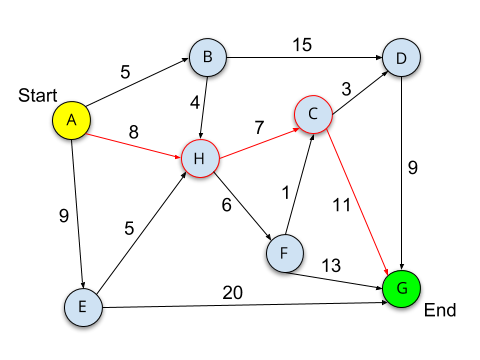

In [124]:
colorPath = Image('Color_Path_Weighted_Graph_480_360.png')
colorPath

### Time Complexity

Dijkstra Time Complexity: O(V log V + E)